# [LAB-13] 2. 시계열 데이터의 탐색

시계열의 구조와 흐름을 이해하기 위한 탐색적 방법

| **종류** | **특징** | **설명** | 
| -------- | -------- | -------- |
| 평균이동법 | 시각적 패턴 파악 | 과거로부터 현재까지의 시계열 데이터를 대상으로 일정 기간 별 이동평균을 계산하고 이들의 추세를 파악하여 다음 기간을 예측하는 방법. 가장 고전적인 예측방법 |
| 지수평활법 | EDA와 CDA의 경계 | 일정 기간의 평균을 이용하는 이동평균법과 달리 모든 시계열의 자료를 사용하여 평균을 구한다. 시간의 흐름에 따라 최근 시계열에 더 많은 가중치를 부여하여 미래를 예측하는 방법 |
| 분해시계열 | 구조적 이해 | 시계열에 영향 주는 요인(추세, 주기, 진치)을 시계열에서 분리해 분석하는 방법 |

## #01. 준비작업

### 1. 라이브러리 참조

평균이동법, 지수평활법을 위한 별도의 패키지는 필요하지 않다. 

In [ ]:
# 기본 참조:
from hossam import load_data
from pandas import melt, DataFrame
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb

# 탐색적 데이터 분석: 시계열분해 패키지:
from statsmodels.tsa.seasonal import seasonal_decompose

# 데이터 전처리: 시계열 데이터의 정상성(평균 일정) 확인을 위한 ADF Test 참조:
from statsmodels.tsa.stattools import adfuller

### 2. 그래프 초기화:

In [2]:
my_dpi = 200  # 이미지 선명도 (100~300)
font_path = r"\Users\itwill\OneDrive\문서\학원수업\NotoSansKR-Regular.ttf"  # 한글을 지원하는 폰트 파일의 경로
fm.fontManager.addfont(font_path)      # 폰트 글꼴을 시스템에 등록함
font_prop = fm.FontProperties(fname = font_path)    # 폰트 속성을 읽어옴
font_name = font_prop.get_name()    # 읽어온 속성에서 폰트의 이름만 추출

plt.rcParams['font.family'] = font_name # 그래프에 한글폰트 적용
plt.rcParams['font.size'] = 6          # 기본 폰트 크기
plt.rcParams['axes.unicode_minus'] = False  
    # 그래프에 마이너스 깨짐 방지 (한글 환경에선 필수)

### 3. 데이터 가져오기:

월간 항공이용 승객 수

In [3]:
origin = load_data('air_passengers')

print("\n===== 데이터 크기 확인 =====")
print(f"데이터셋 크기: {origin.shape}")
print(f"열 갯수: {origin.shape[1]}")
print(f"행 갯수: {origin.shape[0]}")

print("\n===== 타입 확인 =====")
print(origin.info())

origin.head()

[data] https://data.hossam.kr/data/lab13_/air_passengers.xlsx
[desc] 어느 항공사의 월간 탑승객 수 (출처: https://www.kaggle.com/datasets/rakannimer/air-passengers)
[!] Cannot read metadata

===== 데이터 크기 확인 =====
데이터셋 크기: (144, 2)
열 갯수: 2
행 갯수: 144

===== 타입 확인 =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       144 non-null    datetime64[ns]
 1   Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB
None


,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


## #02. 데이터 전처리

### 1. 시계열 인덱스 설정:

In [4]:
df1 = origin.set_index('Month')
df1.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### 2. 차분:

정상성(평균 일정) 확보할 때 까지 차분 무한반복

===== 0차 차분 =====


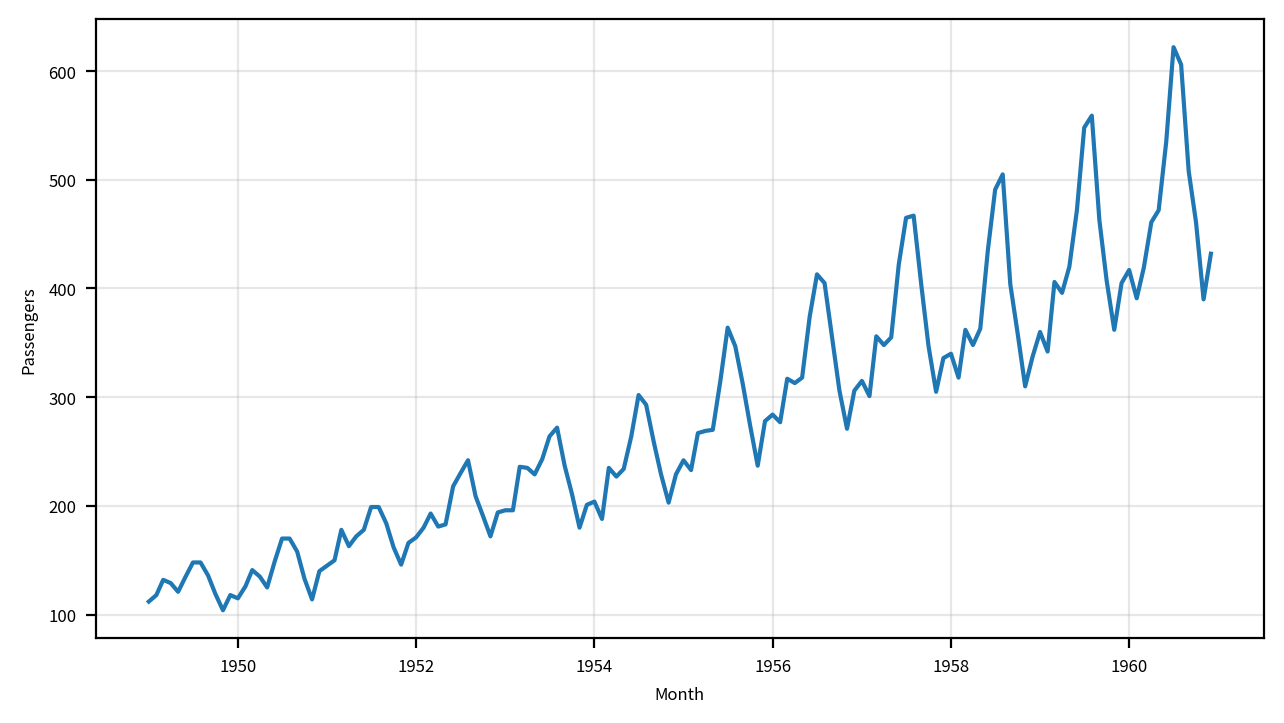

,0
ADF Statistic,0.815369
p-value,0.99188
num of lags,13
num of observations,130
stationarity (mean),False


===== 1차 차분 =====


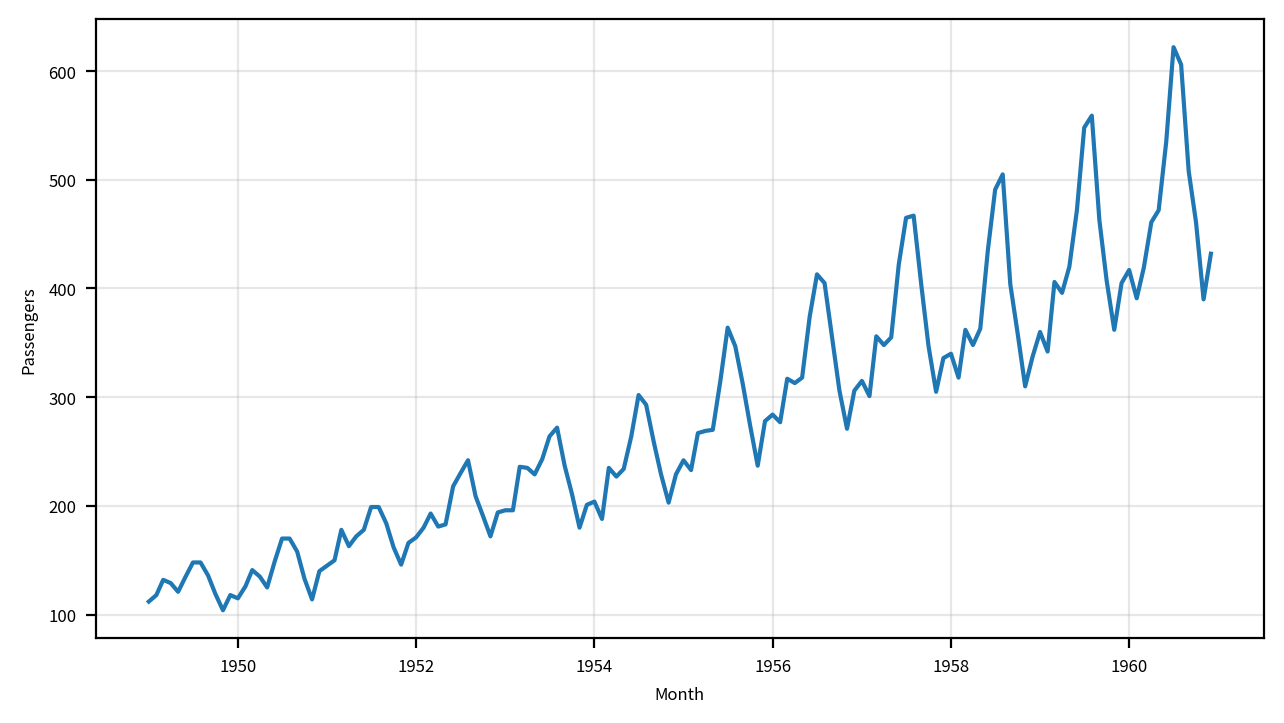

,0
ADF Statistic,-2.829267
p-value,0.054213
num of lags,12
num of observations,130
stationarity (mean),False


===== 2차 차분 =====


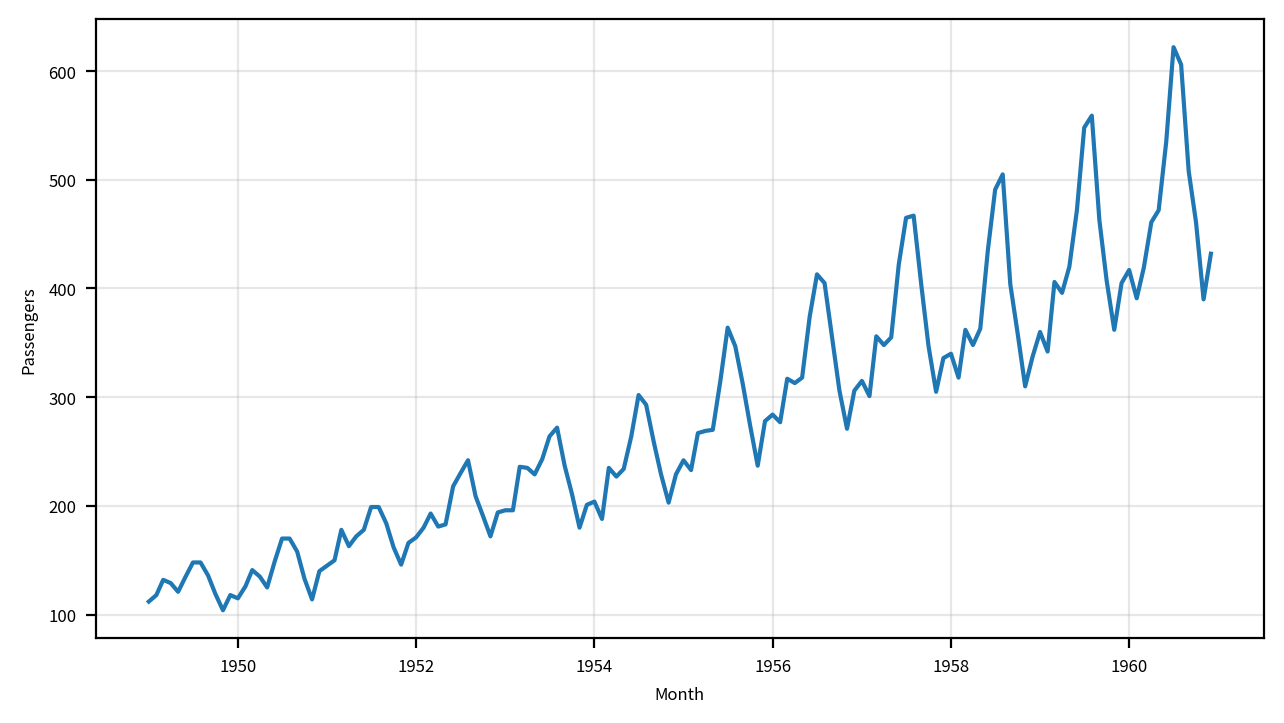

,0
ADF Statistic,-16.384232
p-value,0.0
num of lags,11
num of observations,130
stationarity (mean),True


In [ ]:
diff_df = df1.copy()
yname = 'Passengers'

count = 0  # 반복문용 차분 회차 초기값

while True:
    print(f"===== {count}차 차분 =====")
    
    # 시계열 그래프 시각화 (생략가능):    
    width_px = 1280
    height_px = 720
    rows = 1
    cols = 1
    figsize = (width_px / my_dpi, height_px / my_dpi)
    fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

    sb.lineplot(data = df1, x = df1.index, y = 'Passengers')

    ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()
    plt.close()

    # ADF test 실시:
    ar = adfuller(diff_df[yname])
    ar_dict = {
        'ADF Statistic': ar[0],
        'p-value': ar[1],
        'num of lags': ar[2],
        'num of observations': ar[3]
    }

    ar_dict['stationarity (mean)'] = True if ar[1] <= 0.05 else False

    adf = DataFrame([ar_dict]).T
    display(adf)

    # 정상성(평균 일정) 충족 시 반복중단:
    if ar[1] <= 0.05:
        break

    # 정상성(평균 일정) 미충족 시 시각화 부터 수행할 차분 추가:
    count = count + 1
    diff_df = diff_df.diff().dropna()

## #03. 평균이동법

- 가장 고전적인 시계열데이터 분석방법
- 일정 기간으로 데이터를 묶고 그 기간의 평균으로 데이터를 smooth하게 만드는 방법
  - 평균을 구하기 위해 묶는 구간은 분석가 주관으로 결정
- 데이터 퀄리티 결정 기준: 차이 between 평균이동결과(평균이동법 처리 데이터) and 평균이동결과(원본데이터)
- for: 
  - 추세를 시각적으로 확인
  - 전체 흐름 판단
- effect: 
  - 데이터 평탄화: 단기 변동(noise) 축소
  - 거시적 관점에서의 추세 흐름 도출
- charateristics:
  - 모든 관측값을 동일하게 취급
  - 계산이 상대적으로 단순
  - 변화에 반응 느림
- application:
  - 시계열 데이터의 초기탐색
  - 그래프 매끄럽게 표현할 때
    - but 데이터의 증감 경향 확인을 위해 noise가 있는 원본 데이터를 사용하는 경우도 있음
  - 데이터의 패턴 관찰 (예측용은 아님)

### 1. 원본 time-series data (차분 안된거)에 대한 3, 6, 9개월 단위의 평균

#### [1] 평균이동 수행: `.rolling(묶음단위)`

In [13]:
df2 = df1.copy()
df2['rolling3'] = df2['Passengers'].rolling(3).mean()
df2['rolling6'] = df2['Passengers'].rolling(6).mean()
df2['rolling9'] = df2['Passengers'].rolling(9).mean()
df2.head(10)

,Passengers,rolling3,rolling6,rolling9
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,NaN,NaN,NaN
1949-03-01,132,120.666667,NaN,NaN
1949-04-01,129,126.333333,NaN,NaN
1949-05-01,121,127.333333,NaN,NaN
1949-06-01,135,128.333333,124.500000,NaN
1949-07-01,148,134.666667,130.500000,NaN
1949-08-01,148,143.666667,135.500000,NaN
1949-09-01,136,144.000000,136.166667,131.000000


#### [2] 시계열 그래프 확인:

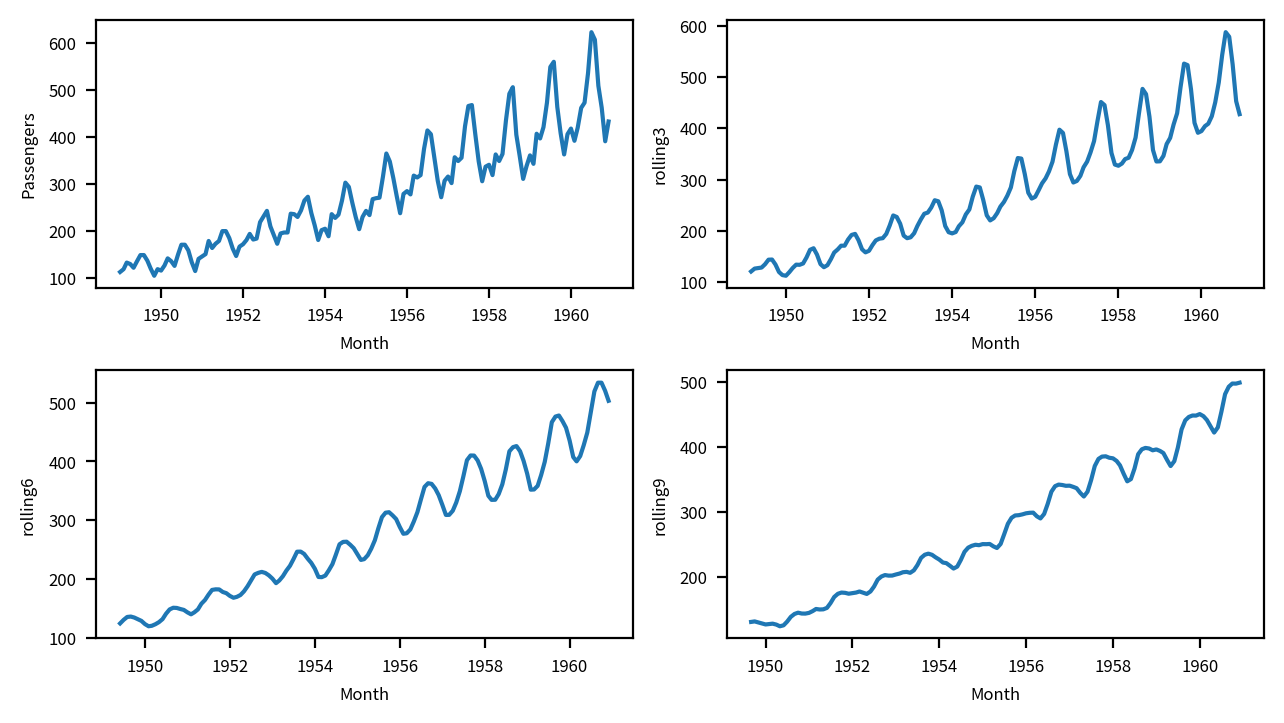

In [ ]:
# 1) 그래프 초기화
width_px = 1280
height_px = 720
rows = 2
cols = 2
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) lineplot 그래프 그리기 (seaborn 사용)
sb.lineplot(data=df2, x=df2.index, y='Passengers', ax=ax[0][0])
sb.lineplot(data=df2, x=df2.index, y='rolling3', ax=ax[0][1])
sb.lineplot(data=df2, x=df2.index, y='rolling6', ax=ax[1][0])
sb.lineplot(data=df2, x=df2.index, y='rolling9', ax=ax[1][1])

# 4) 출력
plt.tight_layout()
plt.show()
plt.close()

> 개월 수 묶음 단위가 커질수록 데이터의 평균이 이동하여 점점 단순한 그래프가 출력된다.
> 이를 통해 월별 승객 수가 꾸준히 증가하는 추세라는 걸 알 수 있다.
>
> 그리고 차분 되지 않은 원본데이터로 확인할 경우, 전반적인 경향을 알 수 있다.

### 2. 차분된 데이터데 대한 3, 6, 9개월 단위의 평균:

,Passengers,rolling3,rolling6,rolling9
Month,,,,
1949-03-01,8.0,NaN,NaN,NaN
1949-04-01,-17.0,NaN,NaN,NaN
1949-05-01,-5.0,-4.666667,NaN,NaN
1949-06-01,22.0,0.000000,NaN,NaN
1949-07-01,-1.0,5.333333,NaN,NaN
1949-08-01,-13.0,2.666667,-1.000000,NaN
1949-09-01,-12.0,-8.666667,-4.333333,NaN
1949-10-01,-5.0,-10.000000,-2.333333,NaN
1949-11-01,2.0,-5.000000,-1.166667,-2.333333


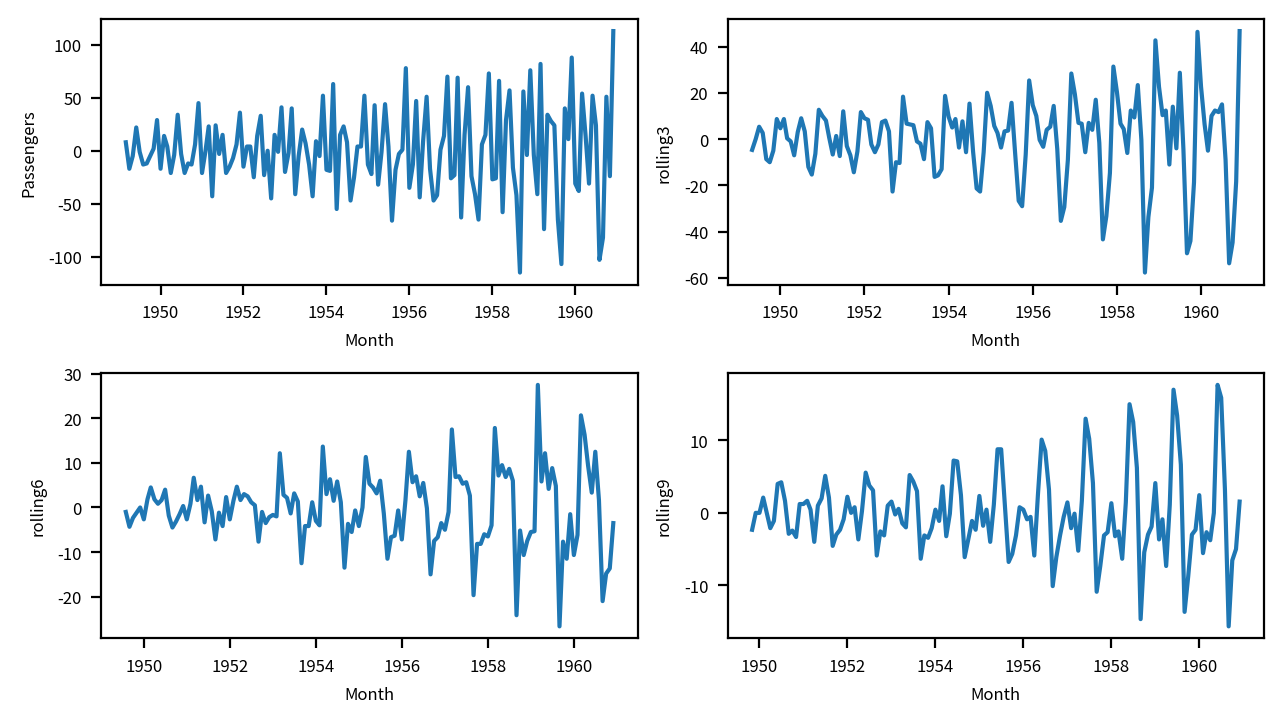

In [ ]:
df3 = diff_df.copy()
df3['rolling3'] = df3['Passengers'].rolling(3).mean()
df3['rolling6'] = df3['Passengers'].rolling(6).mean()
df3['rolling9'] = df3['Passengers'].rolling(9).mean()
display(df3.head(10))

# 1) 그래프 초기화
width_px = 1280
height_px = 720
rows = 2
cols = 2
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) lineplot 그래프 그리기 (seaborn 사용)
sb.lineplot(data=df3, x=df3.index, y='Passengers', ax=ax[0][0])
sb.lineplot(data=df3, x=df3.index, y='rolling3', ax=ax[0][1])
sb.lineplot(data=df3, x=df3.index, y='rolling6', ax=ax[1][0])
sb.lineplot(data=df3, x=df3.index, y='rolling9', ax=ax[1][1])

# 4) 출력
plt.tight_layout()                          # 여백 제거
plt.show()                                  # 그래프 화면 출력
plt.close()                                 # 그래프 작업 종료

> 평균 이동을 할 수록 그래프가 단순해 지고, 6개월을 주기로 증감을 반복하는 추세(트렌드)가 있음을 알 수 있다.

## #04. 지수평활법

- 보다 최근 값에 가중치를 두면서 이동평균을 계산하는 분석방법
  - 과거 데이터 전체를 활용하되 최근데이터에 더 큰 비중 둠
- 일정 기간으로 데이터를 묶고 그 기간의 평균으로 데이터를 smooth하게 만드는건 이동평균법과 동일
- 데이터 퀄리티 결정 기준: 차이 between 평균이동결과(평균이동법 처리 데이터) and 평균이동결과(원본데이터)
- for: 
  - 추세를 시각적으로 확인
  - 단기 예측 안정화
- effect: 
  - 데이터 평탄화(but sensitivity는 이동평균법보다 높음)
  - 미시적 관점에서의 추세 흐름 도출
- charateristics:
  - 데이터의 최근 흐름을 민감하게 반영
  - 조정 가능한 평활 강도 존재
  - 이동평균법보다 변화에 반응 빠름
- application:
  - 매출, 수요 등 실무 예측
  - 최근 변화가 중요한 데이터
  - 빠른 의사결정이 필요한 상황

### 1. 원본에 대한 지수평활법:

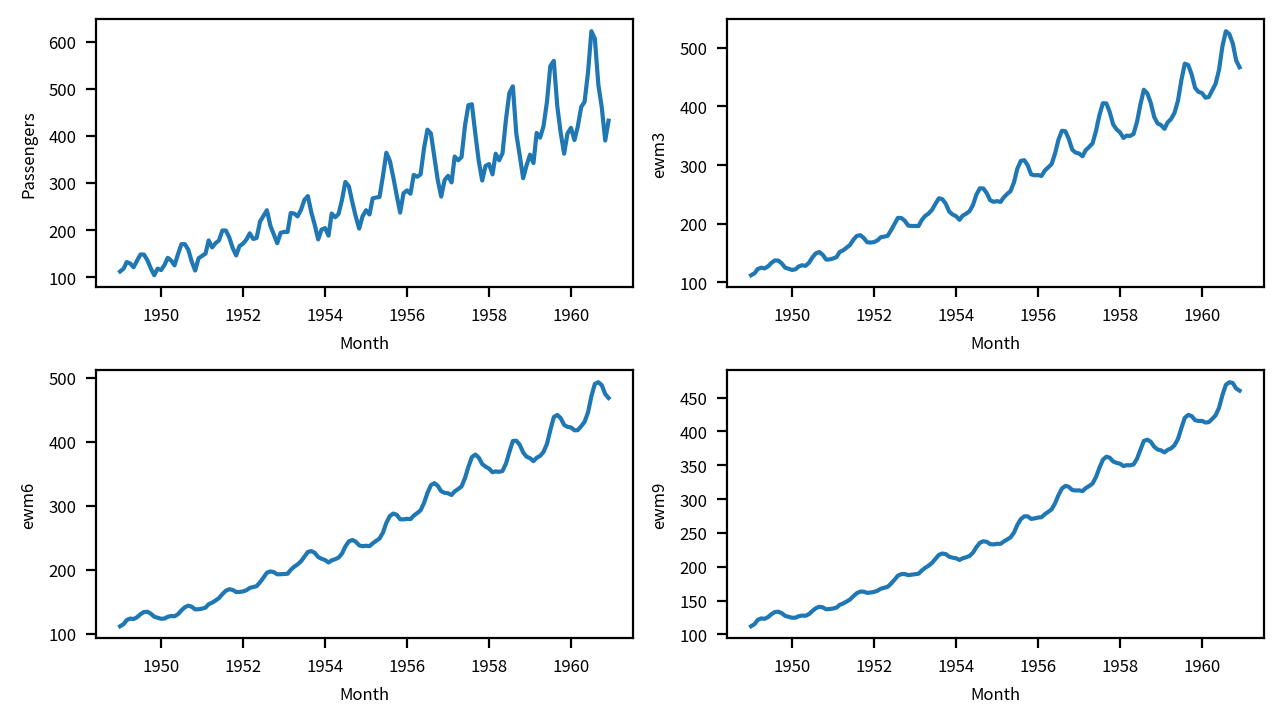

In [17]:
df4 = df1.copy()
df4['ewm3'] = df4['Passengers'].ewm(3).mean()
df4['ewm6'] = df4['Passengers'].ewm(6).mean()
df4['ewm9'] = df4['Passengers'].ewm(9).mean()
df4.head(10)

# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 1280             # 그래프 가로 크기
height_px = 720             # 그래프 세로 크기
rows = 2                    # 그래프 행 수
cols = 2                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) lineplot 그래프 그리기 (w/ seaborn 사용)
sb.lineplot(data=df4, x=df4.index, y='Passengers', ax=ax[0][0])
sb.lineplot(data=df4, x=df4.index, y='ewm3', ax=ax[0][1])
sb.lineplot(data=df4, x=df4.index, y='ewm6', ax=ax[1][0])
sb.lineplot(data=df4, x=df4.index, y='ewm9', ax=ax[1][1])

# 4) 출력
plt.tight_layout()                          # 여백 제거
plt.show()                                  # 그래프 화면 출력
plt.close()                                 # 그래프 작업 종료

### 2. 차분 결과에 대한 지수평활법:

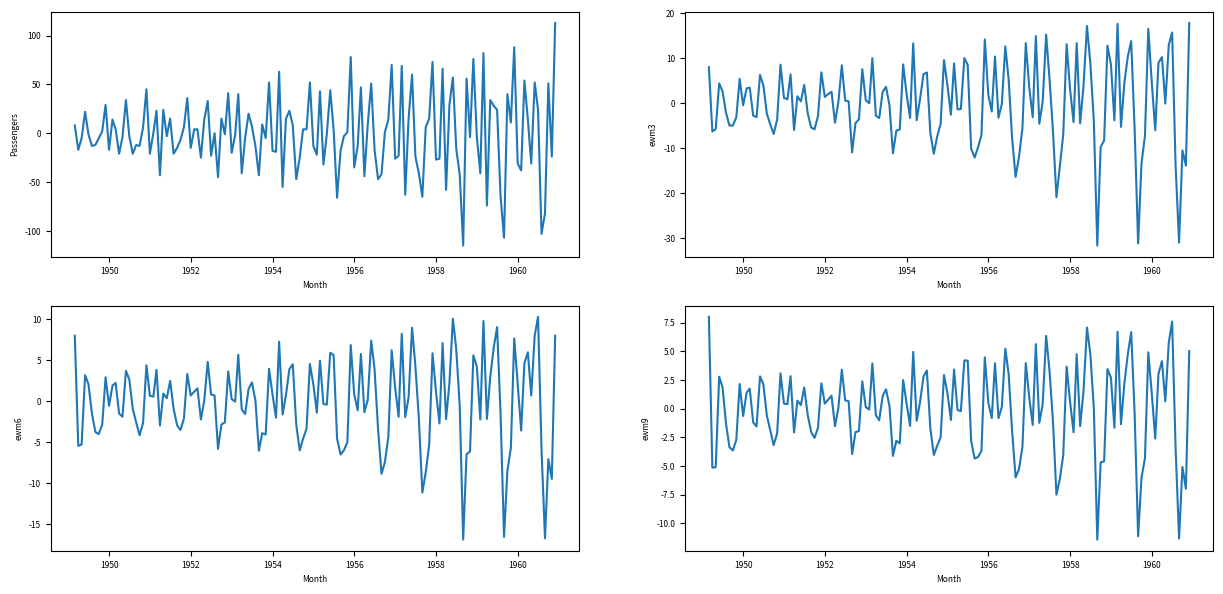

In [18]:
diff_df['ewm3'] = diff_df['Passengers'].ewm(3).mean()
diff_df['ewm6'] = diff_df['Passengers'].ewm(6).mean()
diff_df['ewm9'] = diff_df['Passengers'].ewm(9).mean()

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (15, 7))

sb.lineplot(data=diff_df, x=diff_df.index, y='Passengers', ax=ax1)
sb.lineplot(data=diff_df, x=diff_df.index, y='ewm3', ax=ax2)
sb.lineplot(data=diff_df, x=diff_df.index, y='ewm6', ax=ax3)
sb.lineplot(data=diff_df, x=diff_df.index, y='ewm9', ax=ax4)

plt.show()
plt.close()

> 평균이동법과 지수평활법은 시각화 결과물을 분석가의 주관대로 해석하는 방법이기 때문에 
> 추론통계 보단 탐색적 데이터분석 과정에 더 가깝다.

## #05. 분해시계열

- 하나의 시계열에 대해 영향을 주는 일반적인 요인을 시계열에서 분리해 분석하는 방법
- 시계열 자료를 추세(trend), 주기성(seasonal), 잔차(resid)로 분해함
- for: 
  - 시계열 구조 해석
  - 변화 원인 설명
- effect: 
  - 하나의 시계열 데이터의 성격에 대한 직관적 이해 가능
- charateristics:
  - 장기 흐름(trend), 반복 패턴(seasonal cycle), 불규칙 변동(resid)을 분리
  - 예측(이동평균법, 지수평활법) 보단 설명에 강점
- application:
  - 경제, 정책, 부동산 데이터 분석
  - "왜 이런 패턴이 나오는가"에 대해 설명하는 상황
- 데이터 분해 과정에서 `적용 모델 선택`해야함:

| **구분** | **설명** |
| -------- | -------- |
| 가법모델 (Additive Model) | - 시계열 데이터를 구성하는 각 성분이 `덧셈`을 통해 연결되 있다고 가정 <br> - data fluctuation이 일정할 때 가법모델을 활용한 분해가 적합함 |
| 승법모델 (Multiplicative Model) | - 각 성분이 `곱셈`을 통해 연결되 있다고 가정 <br> - `로그 변환`을 통해 가법 모델로 변환 가능 |

### 1. 분해 시계열 생성:

원칙: 차분을 수행하기 전 원본을 가지고 함

In [19]:
#model_name = 'additive'     # 가법 모델
model_name = 'multiplicative'     # 승법 모델

# 분해 시계열 객체 생성:
sd = seasonal_decompose(df1['Passengers'], model = model_name)

### 2. trend, seasonal, residual을 데이터 프레임으로 변환:

In [20]:
sd_df = DataFrame({
    'original': sd.observed,
    'trend': sd.trend,
    'seasonal': sd.seasonal,
    'resid': sd.resid
}, index = origin.index)

sd_df

,original,trend,seasonal,resid
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
139,NaN,NaN,NaN,NaN
140,NaN,NaN,NaN,NaN
141,NaN,NaN,NaN,NaN
142,NaN,NaN,NaN,NaN


### 3. 분해시계열 시각화:

분해시계열은 전용 시각화 객체가 따로 있음!

| 요소 | 설명 |
| ---- | ---- |
| 추세요인(trend factor) | 자료가 어떤 특정 형태를 취하는 것 |
| 계절요인(seasonal factor) | 고정된 주기에 따른 자료의 변화 |
| 불규칙요인(irregular factor) | 회귀분석에서 잔차에 해당하는 부분 |

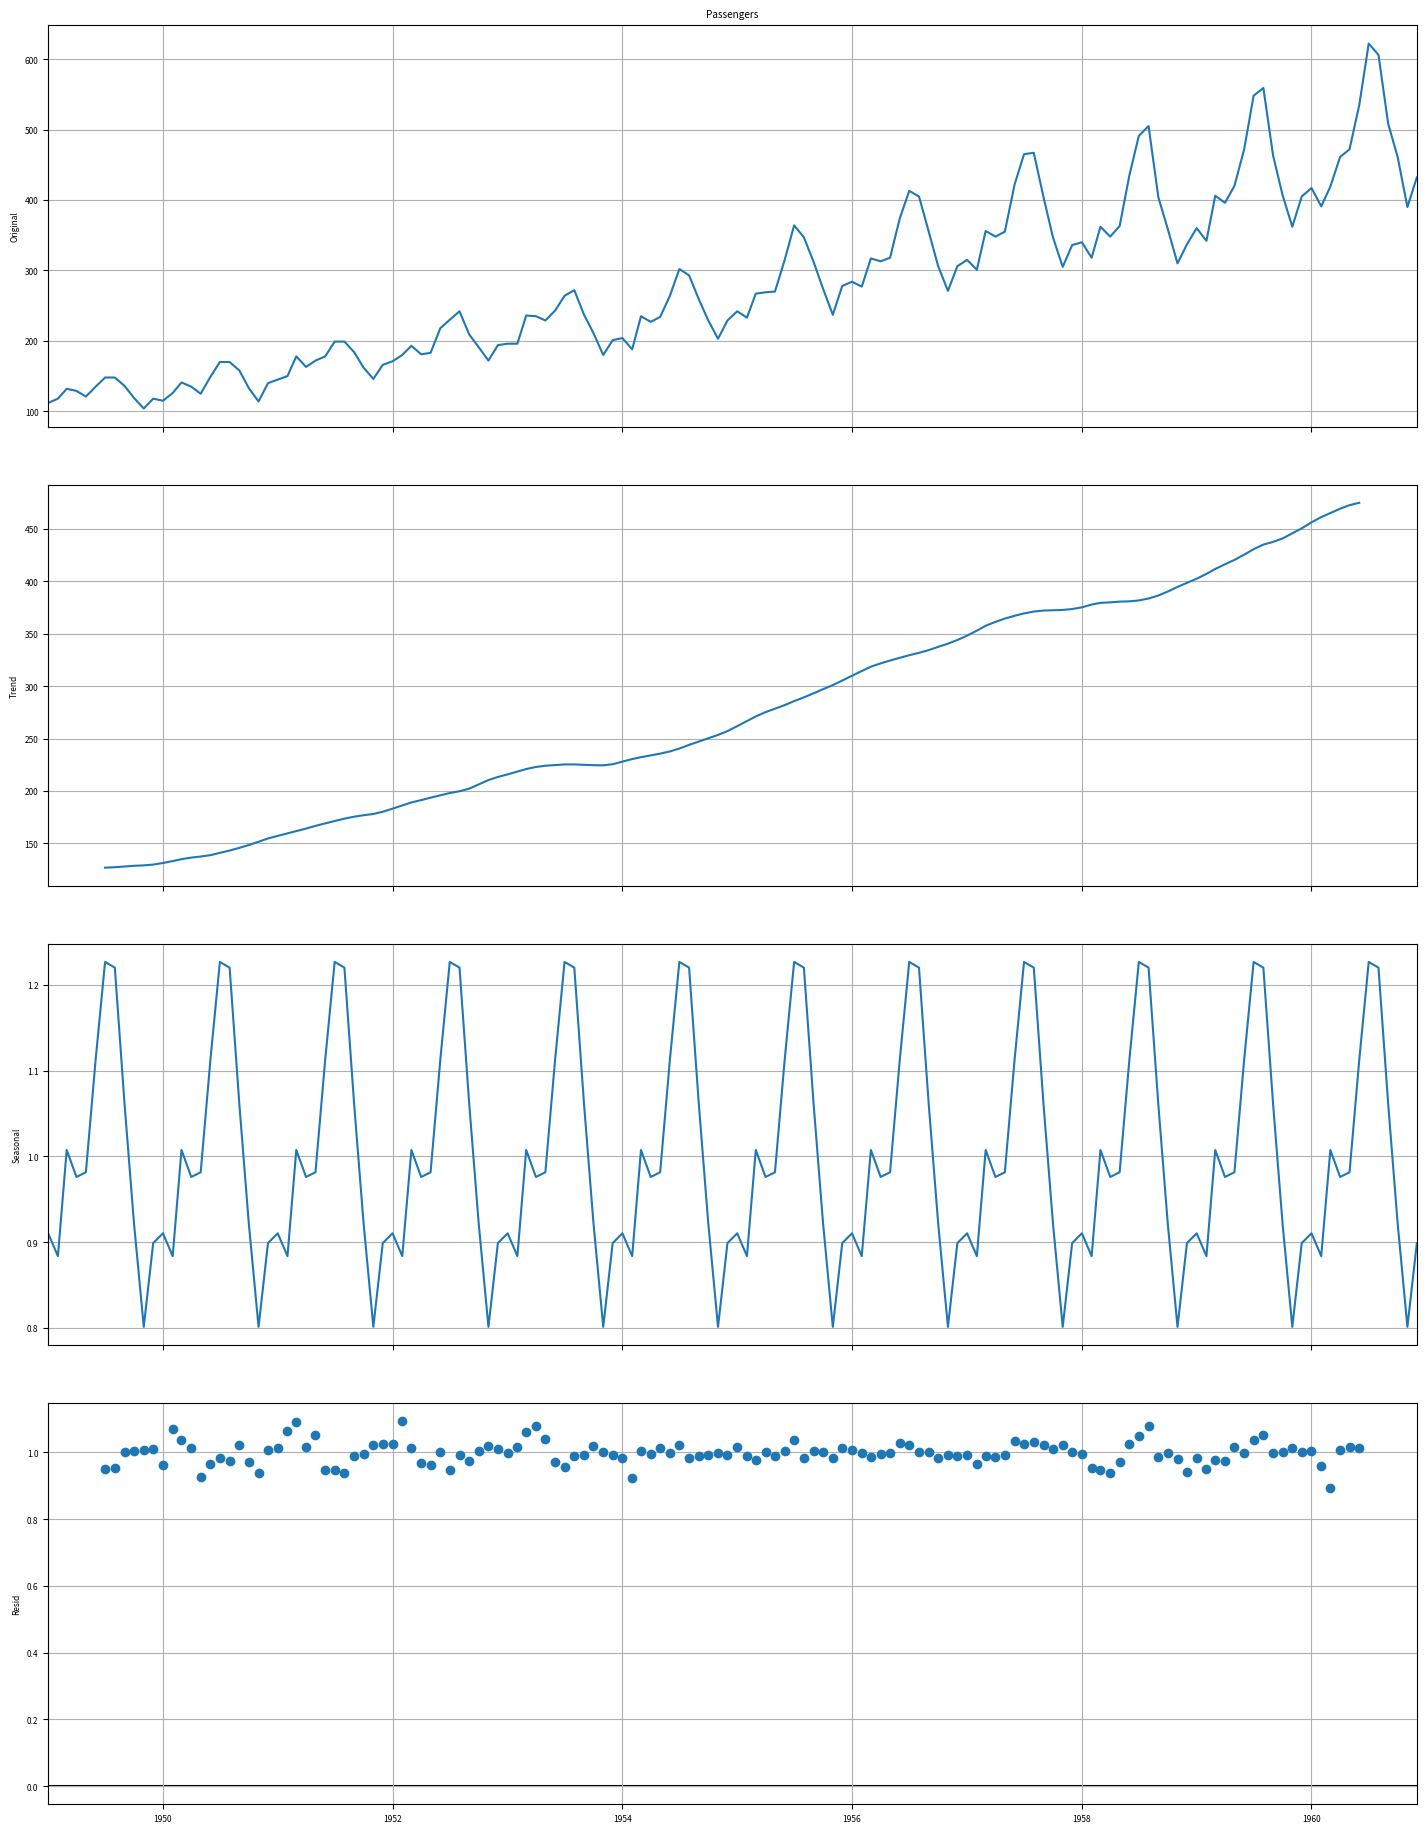

In [21]:
figure = sd.plot()
figure.set_size_inches((15, 20))

fig, ax1, ax2, ax3, ax4 = figure.get_children()

ax1.set_ylabel("Original")
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)
ax4.grid(True)

plt.show()
plt.close()

> - (trend) 원본데이터를 분해 했을 때 전반적으로 증가하는 추세를 보이고 있음
> - (seasonal) 1년 단위로 데이터 패턴이 반복됨
> - (resid) 전체 평균은 1을 기준으로 크게 벗어나지 않는 잔차를 보임
> 
> 위 세 가지로 보아 분석 결과가 타당해 보인다.